In [2]:
#writing code to predict a number
#need some data

In [3]:
#import tensorflow
import tensorflow as tf

In [4]:
print(tf.__version__)

2.18.0


In [5]:
#create data to view and fit
#regression line that fits data points between dependent variable and one or more independent variables

import numpy as np
import matplotlib.pyplot as plt

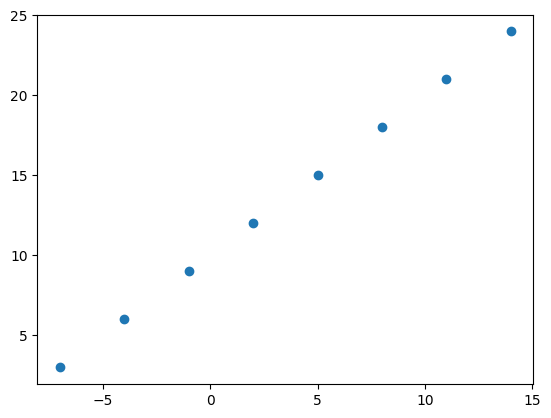

In [6]:
#simple pattern X and y increase by 3 together, y = X + 10

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y= np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize

plt.scatter(X, y)

In [7]:
#input and output shapes..

X.shape, y.shape

((8,), (8,))

In [8]:
#create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedrooms", "bathrooms", "garage"])
house_price = tf.constant([939000])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrooms', b'bathrooms', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939000], dtype=int32)>)

In [9]:
X.shape, y.shape #both the input and output are 8? what if it were one sample

((8,), (8,))

In [10]:
X[0], y[0] #this kind of tensor is called scalars, rank 0 tensor

(-7.0, 3.0)

In [11]:
X[0].ndim #has zero dimensions thats why it has no shape

0

In [12]:
#want to build a model that takes -7 as input and gives back 3, turning our tensors into float 32 tensors
X = tf.cast(tf.constant(X), dtype= tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

In [13]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
X[0].shape, y[0].shape #no dimension, its a scaler value, we want to use input value to predict one output value

(TensorShape([]), TensorShape([]))

In [15]:
#steps in modeling with tensorflow

#1 creating a model, define input and output layers as well as the hidden layers of a neural network

#2 compile the model, define the loss function to tell model how wrong it is, and the optimizer which tells the model how to improve, evaluation metrics

#fitting a model, letting the model try to find patterns between x and y, features and labels

#evaluate

#improve through experimentation

In [16]:
tf.random.set_seed(42)

In [17]:
#create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), #an optimizer tells our nn how it should improve
    metrics = ["mae"] #often times can use a string variable to define a function
)

model.fit(np.expand_dims(X, axis = -1), y, epochs = 5) #epochs the amount of laps or iterations to improve

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 19.7139 - mae: 19.7139
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 19.4326 - mae: 19.4326
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 19.1514 - mae: 19.1514
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 18.8701 - mae: 18.8701
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 18.5889 - mae: 18.5889


In [18]:
prediction = model.predict(np.array([[17.0]]))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


array([[-18.049618]], dtype=float32)

In [19]:
model.evaluate(X, y) #returns the mae of the model from the loss function and the accuracy function

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step - loss: 18.3076 - mae: 18.3076


[18.307601928710938, 18.307601928710938]

In [20]:
#we can improve our model by altering the steps we took to create the model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model_2.fit(np.expand_dims(X, axis = - 1), y, epochs = 100) #this time we'll train for longer

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 19.1209 - mae: 19.1209
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 18.8397 - mae: 18.8397
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 18.5584 - mae: 18.5584
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 18.2772 - mae: 18.2772
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 17.9959 - mae: 17.9959
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 17.7147 - mae: 17.7147
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 17.4334 - mae: 17.4334
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 17.1522 - mae: 17.1522
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 16.8709 - mae: 16.8709
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 16.5897 - mae: 16.5897
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 16.3084 - mae: 16.3084
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 16.0272 - mae: 16.0272
Epoch 13/100
1/1 ━

In [21]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
    metrics = ["mae"]
)

model_3.fit(np.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 12.5864 - mae: 12.5864
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 11.8490 - mae: 11.8490
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - loss: 11.1045 - mae: 11.1045
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 10.3492 - mae: 10.3492
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 9.5806 - mae: 9.5806
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 8.7961 - mae: 8.7961
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 7.9934 - mae: 7.9934
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 7.1703 - mae: 7.1703
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 6.7895 - mae: 6.7895
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.1116 - mae: 7.1116
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.4049 - mae: 7.4049
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.7610 - mae: 7.7610
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [22]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
model_3.predict(np.array([30.0])) #previous model did better. even though loss and mae is lower.

#the model is overfitting and learning the training data far too well, the error its producing is not a accurate representation on what its actually doing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[39.09006]], dtype=float32)

ways to improve a model: change activation function, increase number of neurons, increase the number of layers

Adjusting the learning rate is the most powerful hyper parameter

just as important to fitting the data is evaluating a models performance, adjusting the epochs is the simpliset way to improve the model

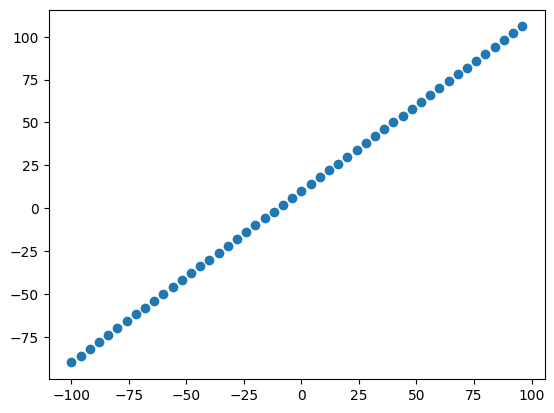

In [24]:
#evaluating a model

# build a model ---> fit it ----> evaluate it ----> tweak it ----> build a model ----> repeat

#hyper parameter is something that can be adjusted in the model

#evaluating models is visualize, visualize, visualize

#might visualize the data - what data are we working with
#might visualize the model itself
#might visualize the training of a model
#might visualize the predictions of a model against the ground truth

#make a bigger dataset

#heres 5 times as much data
X = tf.range(-100, 100, 4)

y = X + 10 #this is the pattern we want our model to learn

plt.scatter(X, y)

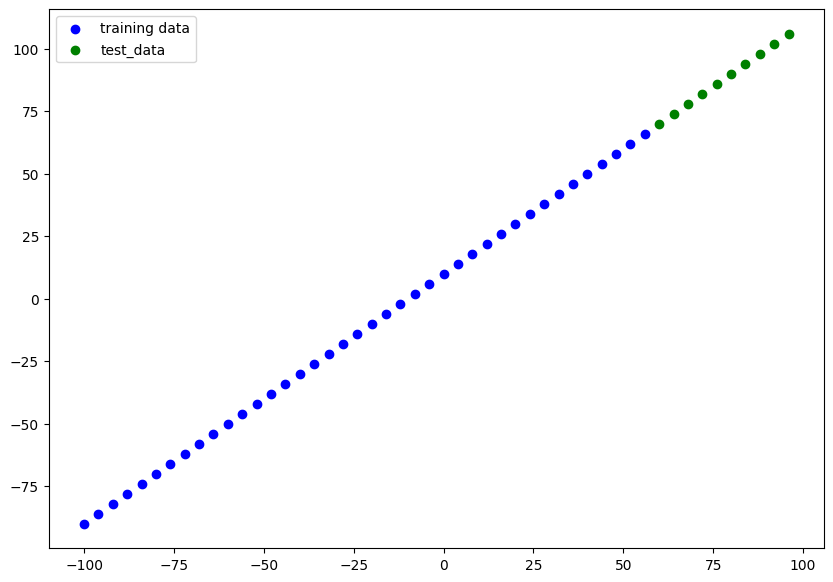

In [25]:
#creating the 3 sets

X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = "b", label = "training data")
plt.scatter(X_test, y_test, c = "g", label = "test_data")
plt.legend();

In [26]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model_4.fit(np.expand_dims(X_train, -1), y_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 49.7143 - mae: 49.7143 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 16.7822 - mae: 16.7822 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 10.4121 - mae: 10.4121 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 8.0165 - mae: 8.0165
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 9.6705 - mae: 9.6705
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.9987 - mae: 7.9987 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 9.6589 - mae: 9.6589
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.9808 - mae: 7.9808 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 9.6472 - mae: 9.6472 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7.9630 - mae: 7.9630
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.6356 - mae: 9.6356
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 7.9451 - mae: 7.9451
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━

In [27]:
model_4_preds = model_4.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


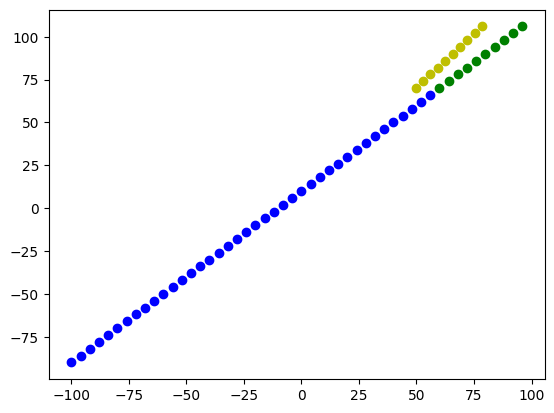

In [28]:
plt.scatter(X_train, y_train, c = "b")
plt.scatter(X_test, y_test,  c = "g")
plt.scatter(model_4_preds, y_test, c = "y")

#predictions are close but off slightly

In [29]:
model_4.summary() #here is a summary of model_4, Dense model, output shape, # of trainable parameters (how complex the model is)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [30]:
X[0], y[0] #gives one number



(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [31]:
#lets create a model that builds automatically
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1]) #passing one number to predict one number, one input... one output
])

model_5.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model_5.summary() #now we can view the summary without fitting the model, because it automatically builds with the input shape

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, input_shape = [1]),
    tf.keras.layers.Dense(1)
])

model_6.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model_6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_6.fit(np.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 53.8275 - mae: 53.8275 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 31.9537 - mae: 31.9537
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.8749 - mae: 10.8749
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 12.3629 - mae: 12.3629
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 14.0967 - mae: 14.0967 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 13.2799 - mae: 13.2799
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 16.0470 - mae: 16.0470
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 10.6296 - mae: 10.6296
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.7030 - mae: 11.7030 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.8179 - mae: 12.8179
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 14.9297 - mae: 14.9297
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.2357 - mae: 10.2357
Epoch 13/100
2/2 ━━━━

In [34]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape = [1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model_8.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

model_8.fit(np.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 25.6740 - mae: 25.6740
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 21.3059 - mae: 21.3059
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 17.2757 - mae: 17.2757
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.9601 - mae: 13.9601
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 11.7975 - mae: 11.7975
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.7804 - mae: 9.7804
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7.9324 - mae: 7.9324
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 8.0605 - mae: 8.0605
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 9.2133 - mae: 9.2133
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 9.5550 - mae: 9.5550
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 9.1646 - mae: 9.1646 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 8.3515 - mae: 8.3515
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 

In [35]:
model_8.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 20)                  │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 935 (3.66 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 624 (2.44 KB)

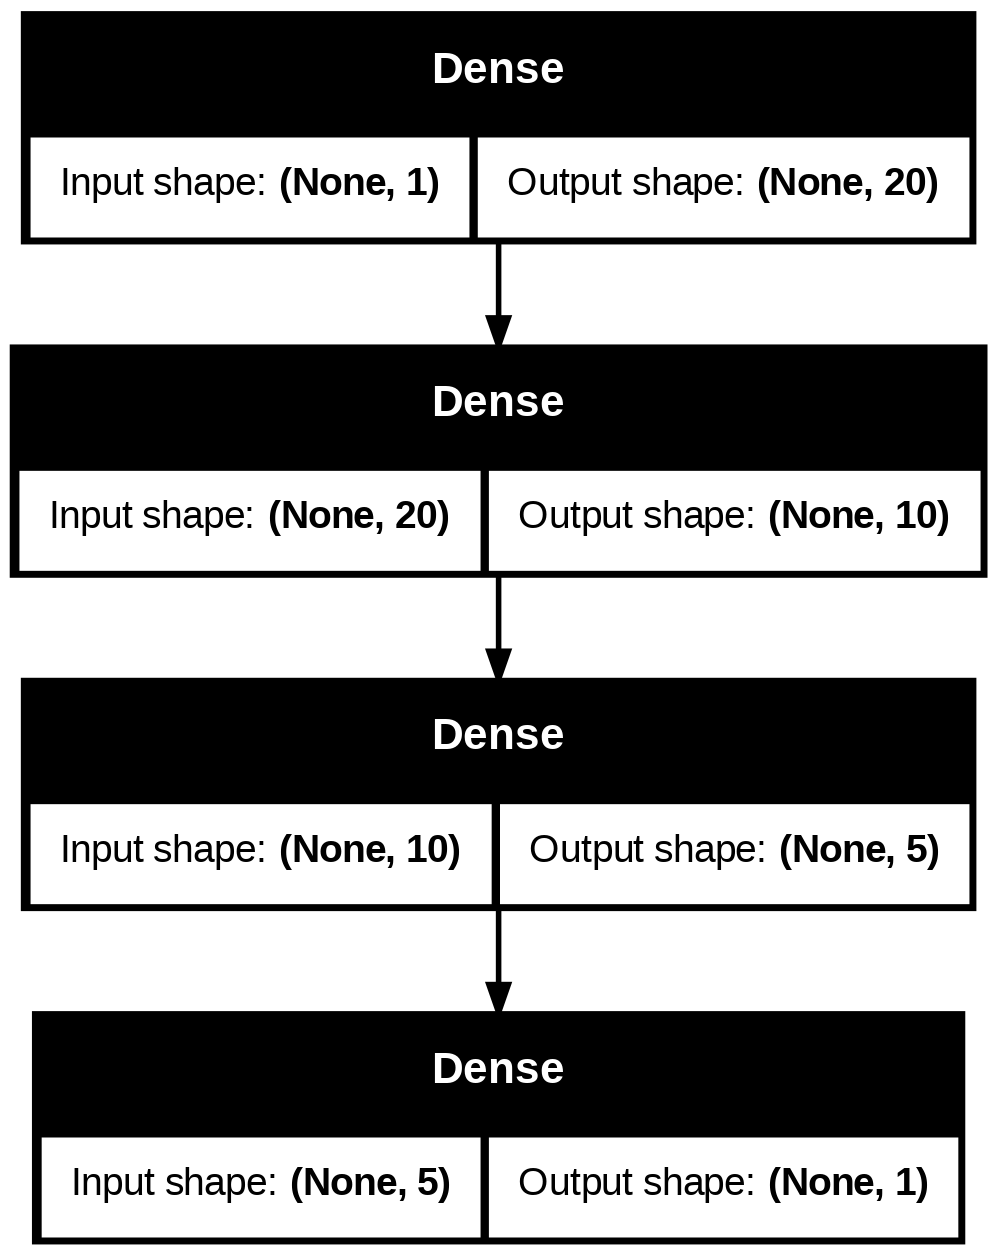

In [36]:
from tensorflow.keras.utils import plot_model

plot_model(model_8, show_shapes = True)

In [37]:
preds = model_8.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


In [38]:
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [39]:
#build a function to visualize our predictions going foward, lets create a plotting function
def plot_preds(train_data = X_train, y_labels = y_train, test_data = X_test, test_labels = y_test, predictions = preds):
  """
  plots training data and test data and compares predictions to ground truth labels
  """

  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, y_labels, c = "blue", label = "training data")
  plt.scatter(test_data, test_labels, c= "green", label = "testing data")
  plt.scatter(test_data, predictions, c = "red", label = "model predictions")
  plt.legend();

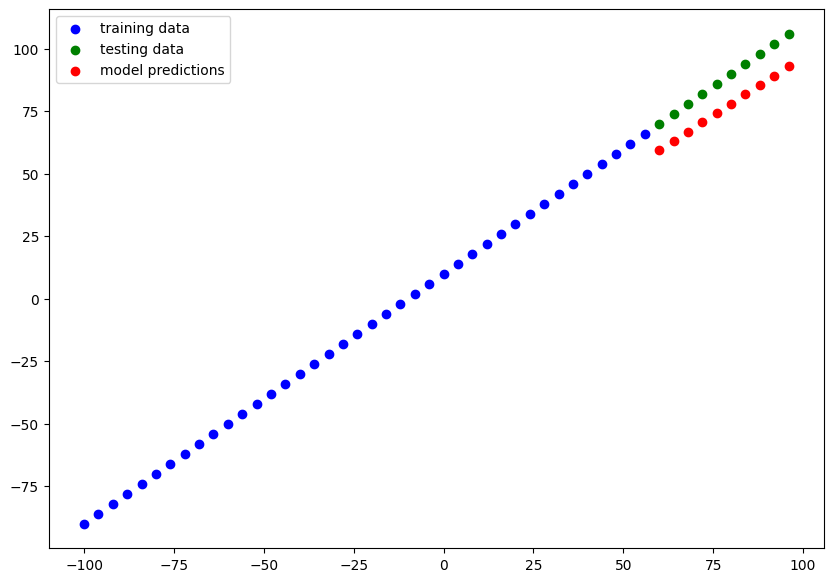

In [40]:
plot_preds() #predictions are incorrect

In [41]:
#evaluating our models predictions with regression evaluation metrics
preds

array([[59.470955],
       [63.18897 ],
       [66.906975],
       [70.624985],
       [74.343   ],
       [78.06102 ],
       [81.77902 ],
       [85.49704 ],
       [89.21506 ],
       [92.93307 ]], dtype=float32)

In [42]:
#common regression evaluation metrics

#mae - how wrong is each one of my models, error
#mse - mean squared error, aplifies outliers
#huber - takes combination of mae and mse

model.evaluate(X_test, y_test) #returns loss and evaluation metric, here metrics and loss are the same thing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - loss: 170.9505 - mae: 170.9505


[170.95046997070312, 170.95046997070312]

In [43]:
#simply compare y_pred to y_test...
tf.keras.losses.mae(y_test, tf.constant(preds)) #cant get the mae because y_pred has different dimensions than y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.529045, 10.811031, 11.093025, 11.375015, 11.656998, 11.93898 ,
       12.220978, 12.50296 , 12.784943, 13.066933], dtype=float32)>

In [44]:
tf.constant(preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[59.470955],
       [63.18897 ],
       [66.906975],
       [70.624985],
       [74.343   ],
       [78.06102 ],
       [81.77902 ],
       [85.49704 ],
       [89.21506 ],
       [92.93307 ]], dtype=float32)>

In [45]:
tf.squeeze(preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([59.470955, 63.18897 , 66.906975, 70.624985, 74.343   , 78.06102 ,
       81.77902 , 85.49704 , 89.21506 , 92.93307 ], dtype=float32)>

In [46]:
#calculate mean absolute error
mae = tf.keras.losses.mae(y_true = y_test, y_pred = tf.squeeze(preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=11.797990798950195>

In [47]:
mse = tf.keras.losses.mse(y_test, tf.squeeze(preds))
mse #use when larger errors are more significant than smaller errors

<tf.Tensor: shape=(), dtype=float32, numpy=139.84860229492188>

In [48]:
huber = tf.keras.losses.huber(y_test, tf.squeeze(preds))
huber

<tf.Tensor: shape=(), dtype=float32, numpy=11.297990798950195>

In [49]:
#make some functions to reuse mae and mse

def mae(y_true, y_pred):
  mae = tf.keras.losses.mae(y_true = y_true, y_pred = tf.squeeze(y_pred))
  print(mae)

def mse(y_true, y_pred):
  mse = tf.keras.losses.mse(y_true = y_true, y_pred = tf.squeeze(y_pred))
  print(mse)

#how do we get these metrics lower?

#we need to run experiments to improve our model.

#build a model -- > fit it  --> evaluate it


#we visualize our models, visualize our predictions

#and then we run experiments to tweak our model and improve our results

#get more examples for the model to train on (more opportunities)

#make model larger (more copmlexity, more layers, more neurons)

#train for longer, more of a chance to find patterns inside the data

model experiments

1st model, 1 layer, 100 epochs

2nd model, 2 layers, 100 epochs

3rd model, 2 layers, 500 epochs

In [50]:
#build model 1
tf.random.set_seed(42)

exp_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

exp_model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

exp_model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 28.0312 - mae: 28.0312
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 9.3318 - mae: 9.3318
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 10.8552 - mae: 10.8552
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.3452 - mae: 10.3452 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.8855 - mae: 9.8855
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.5514 - mae: 11.5514 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 8.5265 - mae: 8.5265
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.9953 - mae: 9.9953  
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 11.6969 - mae: 11.6969 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.6363 - mae: 8.6363 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.1050 - mae: 10.1050 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.8425 - mae: 11.8425
Epoch 13/100
2/2 ━━━━━━━━━━━

In [51]:
model_1_preds = exp_model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


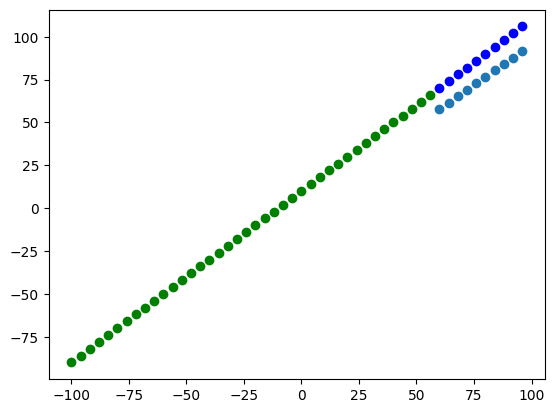

In [52]:
plt.scatter(X_train, y_train, c = "g")
plt.scatter(X_test, y_test, c = "b")
plt.scatter(X_test, model_1_preds)

#for some reason the plotting function is not working

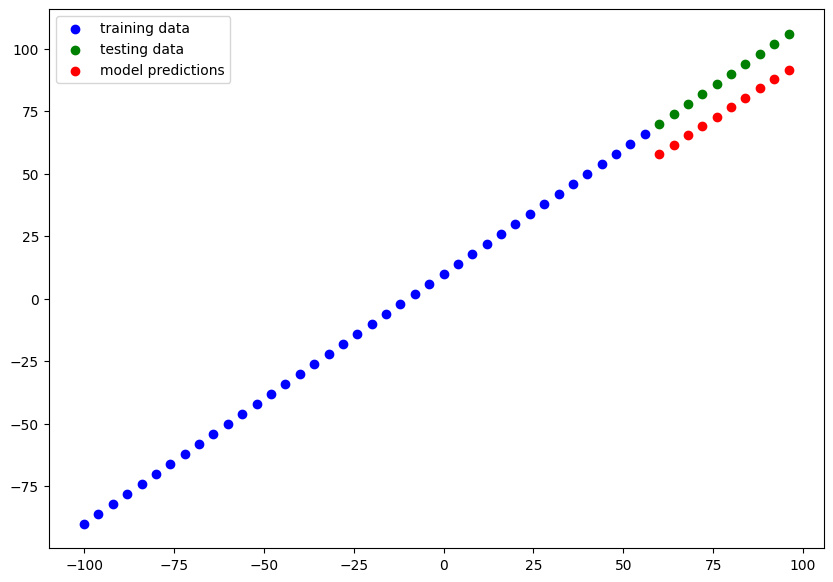

In [53]:
plot_preds(predictions= model_1_preds)

In [109]:
mae1 = mae(y_test, model_1_preds)
mae1

tf.Tensor(13.263736, shape=(), dtype=float32)


In [110]:
mse1 = mse(y_test, model_1_preds)
mse1

tf.Tensor(176.40305, shape=(), dtype=float32)


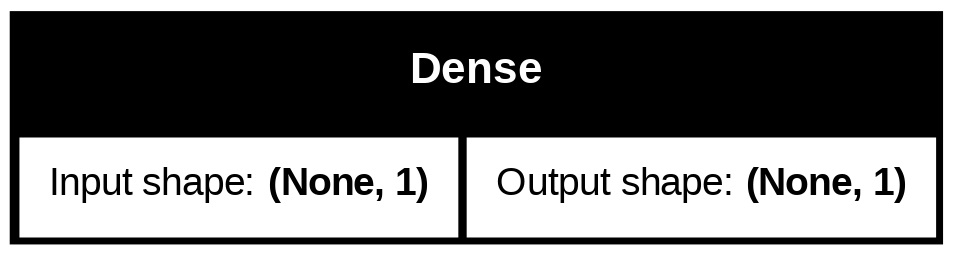

In [56]:
plot_model(model = exp_model_1, show_shapes = True)

In [57]:
tf.random.set_seed(42)

exp_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "input"),
    tf.keras.layers.Dense(1, name = "output")
])

exp_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer =tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

exp_model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 26.2263 - mae: 26.2263 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17.8599 - mae: 17.8599
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 16.9348 - mae: 16.9348
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.3687 - mae: 11.3687
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.1638 - mae: 15.1638
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 15.9524 - mae: 15.9524
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.9829 - mae: 11.9829
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.9734 - mae: 14.9734
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.0447 - mae: 11.0447
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.8833 - mae: 14.8833
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.0107 - mae: 11.0107
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.8542 - mae: 14.8542
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

In [58]:
exp_model_2_preds = exp_model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


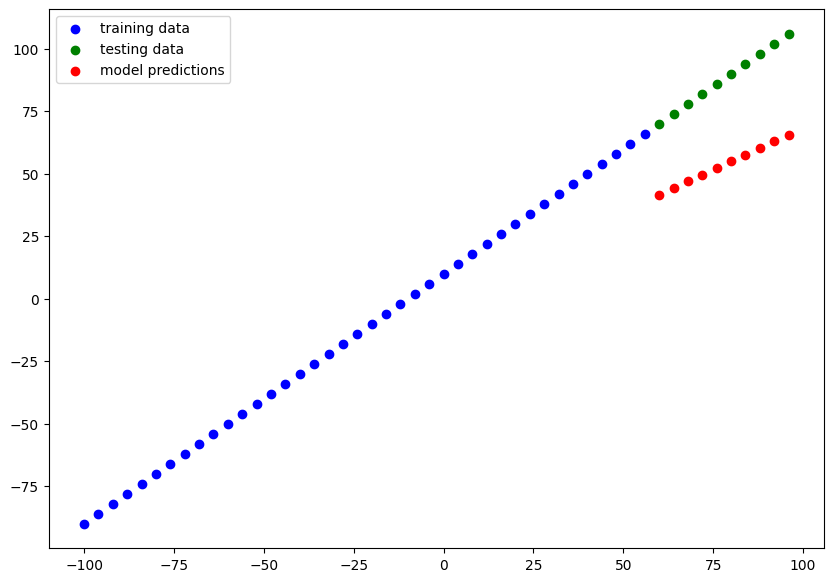

In [59]:
plot_preds(predictions = exp_model_2_preds) #isnt really any better

In [111]:
mae2 = mae(y_test, exp_model_2_preds)

tf.Tensor(34.35739, shape=(), dtype=float32)


In [112]:
mse2 = mse(y_test,exp_model_2_preds)

tf.Tensor(1195.1157, shape=(), dtype=float32)


In [62]:
exp_model_2_preds #for some reason the simple model was better

array([[41.646423],
       [44.312244],
       [46.978058],
       [49.64388 ],
       [52.3097  ],
       [54.975513],
       [57.64134 ],
       [60.30715 ],
       [62.972977],
       [65.638794]], dtype=float32)

In [63]:
tf.random.set_seed(42)

In [64]:
exp_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

exp_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

exp_model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500, verbose = 1)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 40.5263 - mae: 40.5263 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 29.8631 - mae: 29.8631
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 25.5315 - mae: 25.5315
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 24.1586 - mae: 24.1586 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.1178 - mae: 15.1178
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 19.3215 - mae: 19.3215
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.8749 - mae: 13.8749
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15.0846 - mae: 15.0846
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.8578 - mae: 15.8578
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.8829 - mae: 11.8829
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.8595 - mae: 14.8595
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.9397 - mae: 10.9397
Epoch 13/500
2/2 ━━━━━━

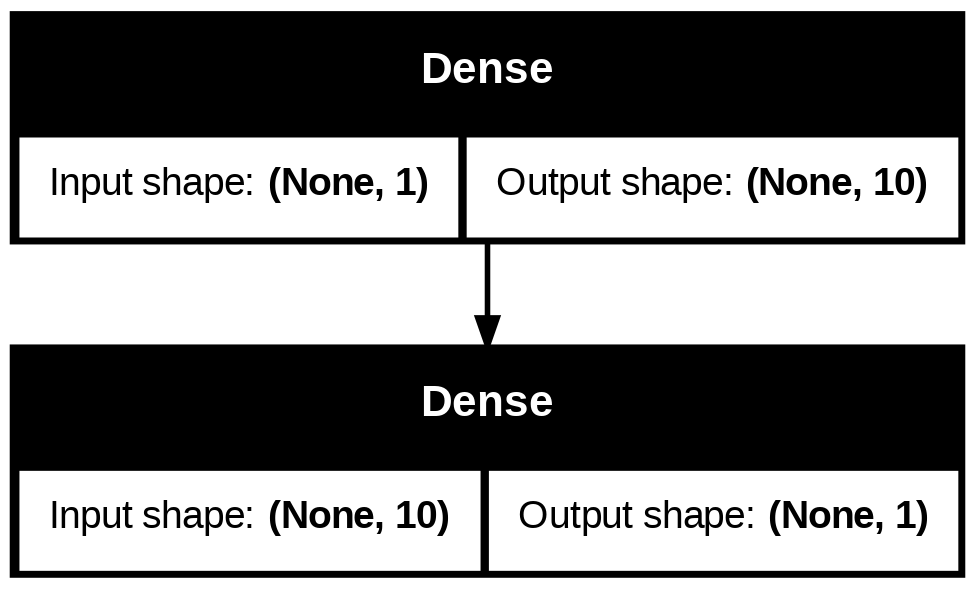

In [65]:
plot_model(exp_model_3, show_shapes = True)

In [66]:
exp_model_3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [74]:
exp_model_3_preds = exp_model_3.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


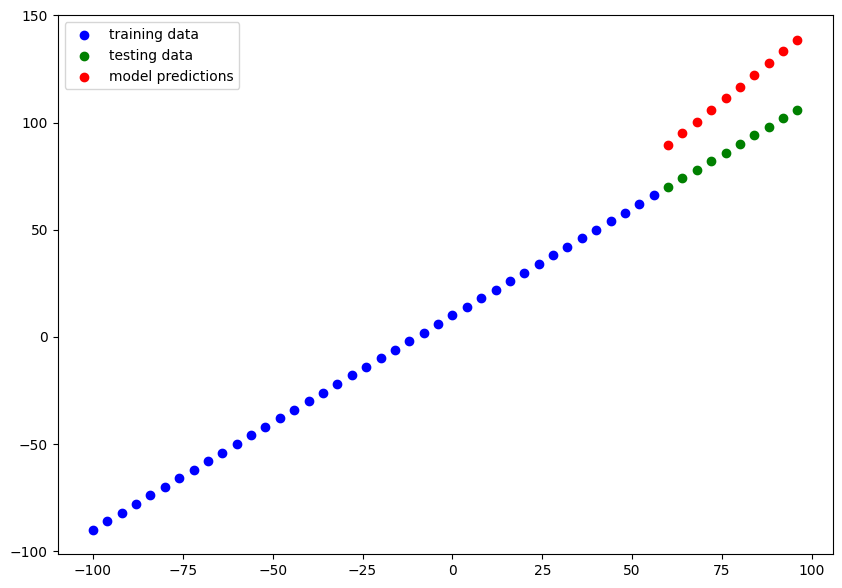

In [73]:
plot_preds(predictions = exp_model_3_preds)

In [113]:
mae3 = mae(y_test, exp_model_3_preds)

tf.Tensor(26.123022, shape=(), dtype=float32)


In [114]:
mse3 = mse(y_test, exp_model_3_preds) #model was a failure overfit to the data. the model has learned the training data too well and doesnt generalize at all to data it hasnt seen before

tf.Tensor(699.85486, shape=(), dtype=float32)


In [116]:
#experiment, experiment, experiment

#lets compare our model results using a pandas dataframe

import pandas as pd


In [117]:
model_results = [["model_1", mae1, mse1], ["model_2", mae2, mse2], ["model_3", mae3, mse3]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])

In [118]:
all_results #for some reason the results are not appearing

,model,mae,mse
0,model_1,None,None
1,model_2,None,None
2,model_3,None,None


In [119]:
exp_model_2.summary() #best model, compare models is what machine learning is all about.. seeing what performs best and seeing what doesnt work.

#looks like model 2 performed the best, start with a small model, one of the main goals to be minimize the time between experiments,

#more experiments = more things youll figure out dont work, you will get closer to wnat does work.

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [120]:
tf.random.set_seed(42)

exp_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape = [1]),
    tf.keras.layers.Dense(1)
])

exp_model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

exp_model_4.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 50, verbose = 1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 35.6859 - mae: 35.6859
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 20.1521 - mae: 20.1521
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 9.8289 - mae: 9.8289
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 10.9250 - mae: 10.9250
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.0355 - mae: 12.0355 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 13.1786 - mae: 13.1786
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 15.6681 - mae: 15.6681 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.2413 - mae: 9.2413
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.1785 - mae: 10.1785
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.1655 - mae: 11.1655
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.2088 - mae: 12.2088
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13.3142 - mae: 13.3142
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/st

In [121]:
exp_model_4_preds = exp_model_4.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


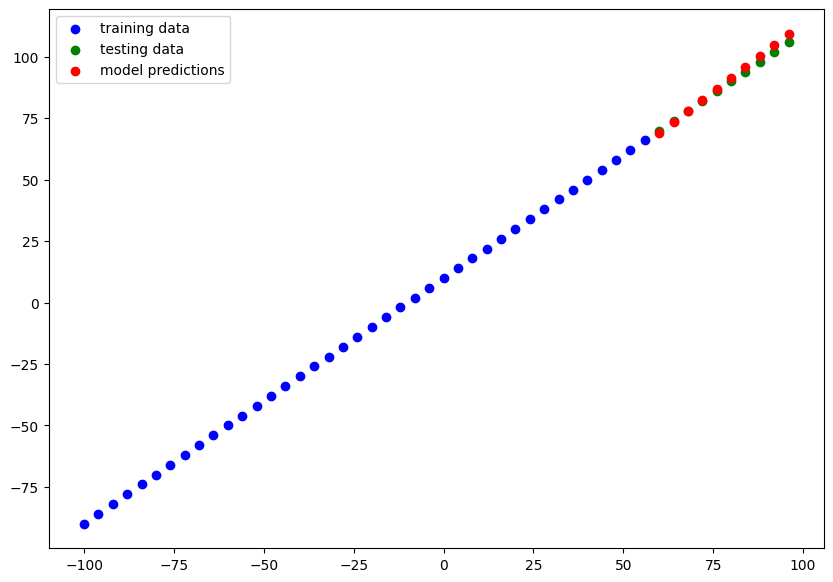

In [122]:
plot_preds(predictions = exp_model_4_preds) #got it.. realized simpiler models were better but increased complexity to almost perfectly match the data

In [136]:
mae(y_test, exp_model_4_preds)

tf.Tensor(1.497377, shape=(), dtype=float32)


In [143]:
#there are two main formats we can save our models to

#save model format, and hdf5 format

#save a model using saved model format
#-- standard save isnt working


#hdf5 universal data format can pass around to other applications

exp_model_4.save("best_model_savedmodel_format.keras")